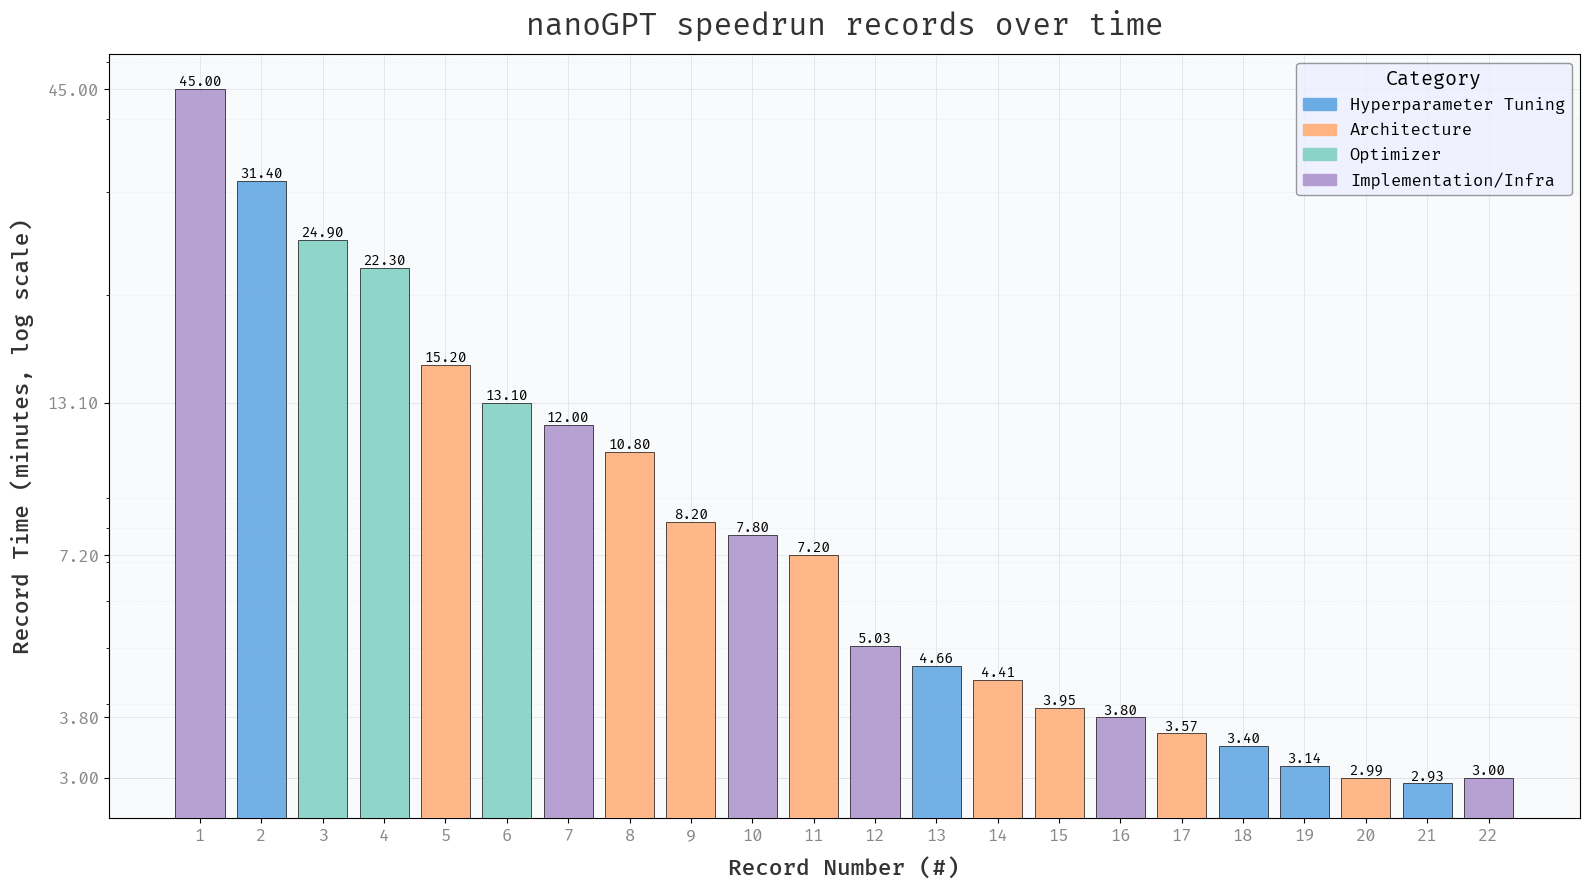

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
plt.rcParams['font.family'] = 'Fira Code'

# Data from the table
data = {
    "Record Number": list(range(1, 23)),
    "Record Time": [
        45, 31.4, 24.9, 22.3, 15.2, 13.1, 12.0, 10.8, 8.2, 7.8, 7.2, 5.03, 4.66, 4.41, 
        3.95, 3.80, 3.57, 3.4, 3.142, 2.992, 2.933, 2.997
    ],
    # Manually assigned categories based on description
    "Category": [
        "Implementation/Infra",          # 1: llm.c baseline
        "hyperparameter tuning",        # 2: Tuned learning rate & rotary embeddings
        "optimizer",                    # 3: Introduced the Muon optimizer
        "optimizer",                    # 4: Muon improvements
        "architecture",                 # 5: Pad embeddings, ReLU², zero-init projections, QK-norm
        "optimizer",                    # 6: Distributed the overhead of Muon
        "Implementation/Infra",         # 7: Upgraded PyTorch 2.5.0
        "architecture",                 # 8: Untied embedding and head
        "architecture",                 # 9: Value and embedding skip connections, momentum warmup, logit softcap
        "Implementation/Infra",         #10: Bfloat16 activations
        "architecture",                 #11: U-net pattern skip connections & double lr
        "Implementation/Infra",         #12: 1024-ctx dense causal attention → 64K-ctx FlexAttention
        "hyperparameter tuning",        #13: Attention window warmup
        "architecture",                 #14: Value Embeddings
        "architecture",                 #15: U-net pattern value embeddings, assorted code optimizations
        "Implementation/Infra",         #16: Split value embeddings, block sliding window, separate block mask
        "architecture",                 #17: Sparsify value embeddings, improve rotary embeddings, drop an attn layer
        "hyperparameter tuning",        #18: Lower logit softcap from 30 to 15
        "hyperparameter tuning",        #19: FP8 head, offset logits, lr decay to 0.1 instead of 0.0
        "architecture",                 #20: Merged QKV weights, long-short attention, attention scale, lower Adam epsilon, batched Muon
        "hyperparameter tuning",        #21: Reduced batch size
        "Implementation/Infra"          #22: 21st record with new timing
    ]
}

category_colors = {
    "hyperparameter tuning": "#6CACE4",    # Soft Sky Blue
    "architecture": "#FFB482",             # Peachy Coral
    "optimizer": "#8BD3C7",                # Mint Turquoise
    "Implementation/Infra": "#B39CD0"      # Lavender Purple
}
# Create DataFrame
df = pd.DataFrame(data)
df["Color"] = df["Category"].map(category_colors)

# Select representative y-tick values
selected_ticks = [df["Record Time"].iloc[0], df["Record Time"].iloc[-1]]
selected_ticks += list(df["Record Time"].iloc[[5, 10, 15]])
selected_ticks = sorted(selected_ticks)

# Enhanced Bar Plot
plt.figure(figsize=(16, 9))
plt.gca().set_axisbelow(True)  
bars = plt.bar(df["Record Number"], df["Record Time"], color=df["Color"], edgecolor='black', linewidth=0.5, alpha=0.95, zorder=3)

# Title and labels with enhanced styling
plt.title('nanoGPT speedrun records over time', fontsize=22, fontweight='normal', color='#333333', pad=14)
plt.xlabel('Record Number (#)', fontsize=16, fontweight='medium', color='#333333', labelpad=10)
plt.ylabel('Record Time (minutes, log scale)', fontsize=16, fontweight='medium', color='#333333', labelpad=10)

# Set Log Scale
plt.yscale('log')

# Customize grid lines
plt.grid(True, which='major', linestyle='-', linewidth=0.6, alpha=0.3, zorder=0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.4, alpha=0.2, zorder=0)

# Set tick parameters lighter
plt.xticks(df["Record Number"], fontsize=12, color='#888888')
plt.yticks(selected_ticks, [f'{yt:.2f}' for yt in selected_ticks], fontsize=12, color='#888888')

# Background color
plt.gca().set_facecolor('#f8fafc')
plt.gcf().set_facecolor('#ffffff')

# Custom Legend with updated labels and colors
patches = [mpatches.Patch(color=color, label=cat.title()) for cat, color in category_colors.items()]
plt.legend(handles=patches, title="Category", fontsize=12, title_fontsize=14, loc='upper right', frameon=True, facecolor='#eeefff', edgecolor='gray', shadow=False)

# Horizontal annotations on bars
for bar, time in zip(bars, df["Record Time"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.2f}', ha='center', va='bottom',
             fontsize=10, color='black')

plt.tight_layout()
plt.show()

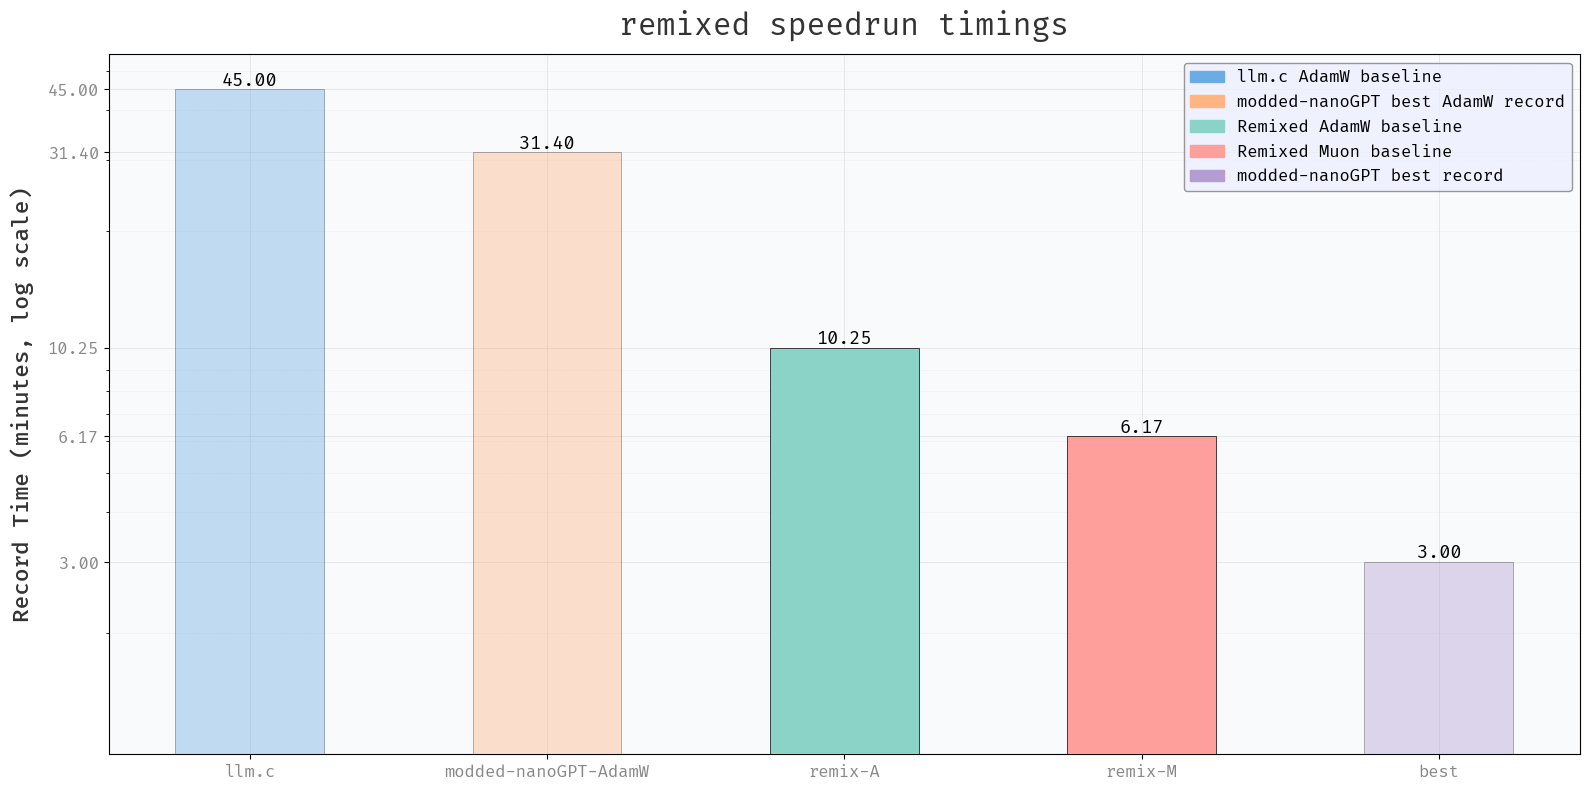

In [3]:
df = pd.DataFrame(
    {
        'Record Time': [45.00, 31.40, 10.25, 6.17, 3.0],
        'labels': ['llm.c', 'modded-nanoGPT-AdamW', 'remix-A', 'remix-M', 'best'],
        'Color': ["#6CACE4", "#FFB482", "#8BD3C7", "#FF9F9B", "#B39CD0"],
        'alphas': [0.4, 0.4, 1.0, 1.0, 0.4],
    }
)

# Enhanced Bar Plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_axisbelow(True)  
bars = plt.bar(df['labels'], df['Record Time'], width=0.5, color=df["Color"], edgecolor='black', linewidth=0.5, zorder=3)

# Title and labels with enhanced styling
plt.title('remixed speedrun timings', fontsize=22, fontweight='normal', color='#333333', pad=14)
# plt.xlabel('Record Number (#)', fontsize=16, fontweight='medium', color='#333333', labelpad=10)
plt.ylabel('Record Time (minutes, log scale)', fontsize=16, fontweight='medium', color='#333333', labelpad=10)

# Set Log Scale
plt.yscale('log')
plt.ylim((1.0, 55.0))

# Customize grid lines
plt.grid(True, which='major', linestyle='-', linewidth=0.6, alpha=0.3, zorder=0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.4, alpha=0.2, zorder=0)

# Set tick parameters lighter
selected_ticks = list(df['Record Time'])
plt.xticks(range(len(df['labels'])), list(df['labels']), fontsize=12, color='#888888')
plt.yticks(selected_ticks, [f'{yt:.2f}' for yt in selected_ticks], fontsize=12, color='#888888')

# Background color
plt.gca().set_facecolor('#f8fafc')
plt.gcf().set_facecolor('#ffffff')

# Custom Legend with updated labels and colors
category_colors = {
    "llm.c AdamW baseline": "#6CACE4",
    "modded-nanoGPT best AdamW record": "#FFB482",
    "Remixed AdamW baseline": "#8BD3C7",
    "Remixed Muon baseline": "#FF9F9B",
    "modded-nanoGPT best record": "#B39CD0",
}

patches = [mpatches.Patch(color=color, label=cat) for cat, color in category_colors.items()]
plt.legend(handles=patches, title=None, fontsize=12, title_fontsize=14, loc='upper right', frameon=True, facecolor='#eeefff', edgecolor='gray', shadow=False)

# Horizontal annotations on bars
for bar, time, alpha in zip(bars, df["Record Time"], df['alphas']):
    bar.set_alpha(alpha)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.2f}', ha='center', va='bottom',
             fontsize=13, color='black')

plt.tight_layout()
plt.show()